In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
 
data=pd.read_csv("Salary_Data.csv")
data.columns


Index(['YearsExperience', 'Salary'], dtype='object')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


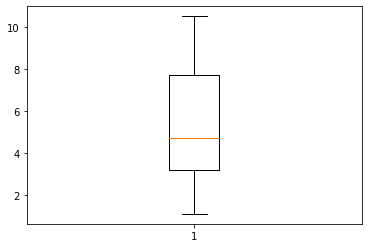

In [4]:
plt.boxplot(data.YearsExperience)
data.describe() 

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

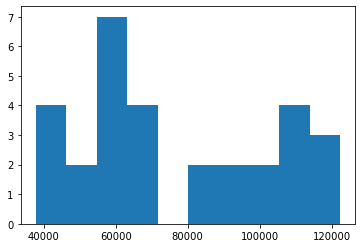

In [10]:
plt.hist(data.Salary) 
 

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

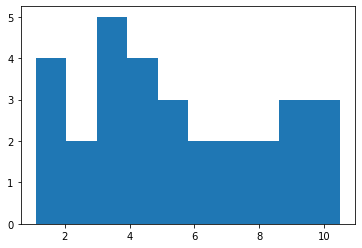

In [11]:
plt.hist(data.YearsExperience) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1fea72b40a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fea72afc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fea8460e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1fea8308d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fea83087f0>],
 'means': []}

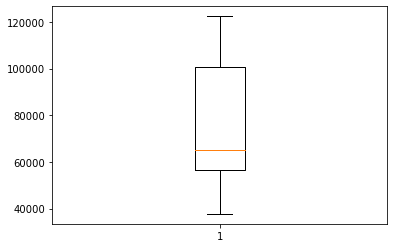

In [7]:
plt.boxplot(data.Salary) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1fea8595d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1fea722a8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fea7d1d1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fea7b5c730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fea85751c0>],
 'means': []}

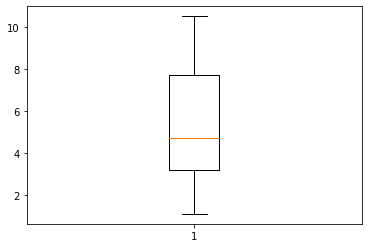

In [8]:
plt.boxplot(data.YearsExperience) 

Text(0, 0.5, 'salary')

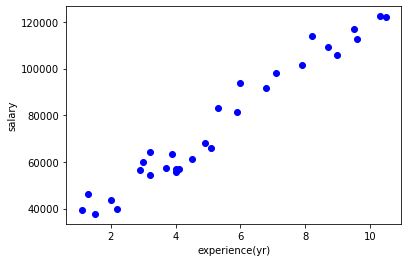

In [12]:
plt.plot(data.YearsExperience,data.Salary,"bo")
plt.xlabel("experience(yr)")
plt.ylabel("salary")
 

In [13]:
data.Salary.corr(data.YearsExperience) 

0.9782416184887598

In [14]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=data).fit()
model.params  

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        20:21:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
pred = model.predict(data.iloc[:,0])
pred  

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [18]:
model.resid 
model.resid_pearson 

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [19]:
print(model.conf_int(0.05))

                            0             1
Intercept        21136.061314  30448.339084
YearsExperience   8674.118747  10225.805896


In [20]:
pred = model.predict(data.iloc[:,0])
pred
pd.set_option("display.max_rows", None) 
pred
rmse_lin = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred))**2))
rmse_lin 


5592.043608760662

Text(0, 0.5, 'salary')

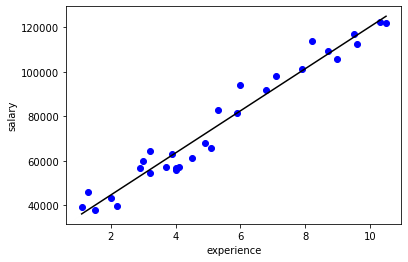

In [21]:
import matplotlib.pylab as plt
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='blue')
plt.plot(data['YearsExperience'],pred,color='black')
plt.xlabel('experience')
plt.ylabel('salary')

In [22]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=data).fit()
model2.params
model2.resid 
model2.resid_pearson 
 

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           3.25e-13
Time:                        20:28:39   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
pred2 = model2.predict(pd.DataFrame( data['YearsExperience'])) 

In [25]:
pred2
rmse_log = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred2))**2))
rmse_log 

10302.893706228304

In [26]:
pred2.corr(data.Salary)

0.9240610817882641

Text(0, 0.5, 'salary')

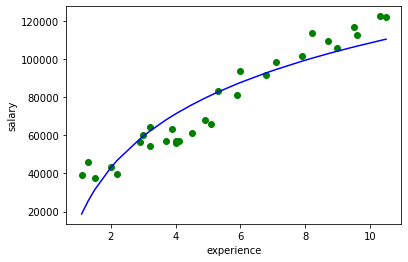

In [27]:
plt.scatter(x= data['YearsExperience'],y=data['Salary'],color='green')
plt.plot(data['YearsExperience'],pred2,color='blue')
plt.xlabel('experience')
plt.ylabel('salary')

In [28]:
model3 = smf.ols('np.log(Salary)~data',data=data).fit()
model3.params
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     580.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           6.57e-23
Time:                        20:32:08   Log-Likelihood:                 44.619
No. Observations:                  30   AIC:                            -83.24
Df Residuals:                      27   BIC:                            -79.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1515      0.054    189.549      0.000      10.042      10.261
data[0]       -0.0049      0.018     -0.272      0.788      -0.042       0.032
data[1]      1.38e-05   1.88e-06      7.332      0.000    9.94e-06    1.77e-05
==============================================================================
Omnibus:                        4.075   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.677
Skew:                          -0.806   Prob(JB):                        0.159
Kurtosis:                       2.412   Cond. No.                     4.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
pred_log = model3.predict(pd.DataFrame(data['YearsExperience'])) 

In [30]:
pred_log 

0     10.688947
1     10.782645
2     10.664725
3     10.742203
4     10.691069
5     10.918751
6     10.966663
7     10.886951
8     11.024939
9     10.922343
10    11.004547
11    10.901610
12    10.917658
13    10.918874
14    10.972505
15    11.064732
16    11.037401
17    11.271805
18    11.245035
19    11.418088
20    11.383747
21    11.472439
22    11.510279
23    11.681419
24    11.618493
25    11.563898
26    11.718552
27    11.658254
28    11.789413
29    11.781263
dtype: float64

In [31]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3 

0      43868.285649
1      48177.397570
2      42818.482305
3      46267.856086
4      43961.468981
5      55201.803665
6      57910.997620
7      53474.027008
8      61386.142536
9      55400.428574
10     60146.982144
11     54263.640777
12     55141.489314
13     55208.610930
14     58250.344195
15     63878.083828
16     62155.875124
17     78574.727346
18     76499.177482
19     90952.104113
20     87881.720408
21     96032.188152
22     99735.707922
23    118352.000128
24    111134.148249
25    105229.409457
26    122829.494243
27    115641.930703
28    131849.094935
29    130778.807922
dtype: float64

In [32]:
rmse_exp = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred3))**2))
rmse_exp  

3933.9585876469746

In [33]:
pred3.corr(data.Salary)

0.9911042727706811

NameError: name 'wcat' is not defined

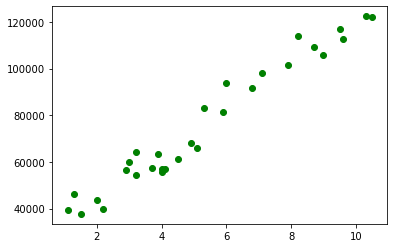

In [34]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='green')
plt.plot(wcat.Waist,pred3,color='blue')
plt.xlabel('experience')
plt.ylabel('salary')


In [35]:
student_resid = model3.resid_pearson 
student_resid 

array([-1.88886417, -0.72522866, -2.1944562 , -1.0602411 , -1.68569245,
        0.44682972,  0.65812509,  0.31219728,  0.8436551 ,  0.55125619,
        0.86394967,  0.48251348,  0.56201162,  0.57863546,  0.83175103,
        1.06904089,  1.04873364,  0.96895321,  1.0694128 ,  0.56078085,
        0.74505701,  0.40017368,  0.27034123, -0.67861683, -0.26793686,
        0.05803436, -0.8481693 , -0.4570827 , -1.29142254, -1.22374146])

Text(0, 0.5, 'Standardized Residual')

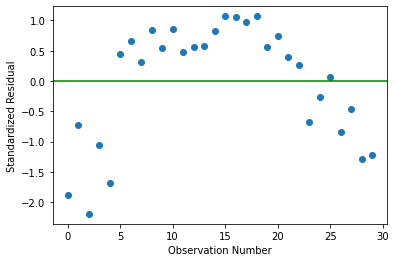

In [36]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

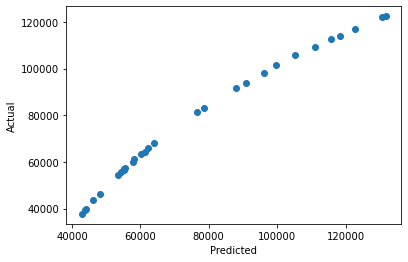

In [37]:
plt.scatter(x=pred3,y=data.Salary)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [38]:
data["exp_Sq"] = data.YearsExperience*data.YearsExperience
data

,YearsExperience,Salary,exp_Sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [39]:
model_quad = smf.ols("np.log(Salary)~YearsExperience+exp_Sq",data=data).fit()
model_quad.params 

Intercept          10.336852
YearsExperience     0.202382
exp_Sq             -0.006614
dtype: float64

In [40]:
model_quad.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           3.95e-18
Time:                        20:38:23   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience     0.2024      0.027      7.601      0.000       0.148       0.257
exp_Sq             -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""